# Binary Classification

Classifying into on of two classes. Represented by 1 and 0 in data.

# Accuracy and Cross-Entropy

*Accuracy* is the ratio of correct predictions to total predictions.

The problem with accuracy (and most classficiation metrics), is that it can't be used as a loss function.

<br/>

SGD requires a smooth changing function, but accuracy changes in "jumps," as it is a ratio of counts.

One substitute for accuracy that fits well with SGD is the *cross-entropy* function.

<br/>

Cross entropy is the distance between probabilities.

# The Sigmoid Function

To convert the outputs produced by a dense layer into probabilities, we use a sigmoid function.

We use a *threshold probablity*, where values that are above are assigned 1 and values below are assigned 0.

In [19]:
import pandas as pd


In [20]:
ion = pd.read_csv('./ion.csv', index_col=0)
ion.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
1,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,good
2,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,bad
3,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,good
4,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,bad
5,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,good


In [21]:
ion_df = ion.copy()
ion_df['Class'] = ion_df['Class'].map({'good': 0, 'bad': 1})
ion_df.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V26,V27,V28,V29,V30,V31,V32,V33,V34,Class
1,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,0
2,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,1
3,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,0
4,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,1
5,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,0


In [22]:
ion_df_train = ion_df.sample(frac=0.7, random_state=0)
ion_df_valid = ion_df.drop(ion_df_train.index)

In [23]:
min_ = ion_df_train.min(axis=0)
max_ = ion_df_train.max(axis=0)

In [24]:
ion_df_train = (ion_df_train - min_) / (max_ - min_)
ion_df_valid = (ion_df_valid - min_) / (max_ - min_)

In [25]:
ion_df_train.dropna(axis=1, inplace=True)
ion_df_valid.dropna(axis=1, inplace=True)

In [26]:
X_train = ion_df_train.drop('Class', axis=1)
X_valid = ion_df_valid.drop('Class', axis=1)
y_train = ion_df_train['Class']
y_valid = ion_df_valid['Class']

In [27]:
from tensorflow import keras
from tensorflow.keras import layers

In [28]:
features_shape = [X_train.shape[1]]
features_shape

[33]

In [29]:
model = keras.Sequential([
    layers.Dense(4, activation='relu', input_shape=features_shape),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

In [ ]:

model = Sequential()
model.add(Conv2D(256, (3, 3), input_shape = X_train.shape[1:], padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding= 'same'))
model.add(BatchNormalization(axis=-1))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2), padding='same'))
model.add(BatchNormalization(axis=-1))

model.add(Conv2D(16, (3,3)), padding='same')
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=='same'))
model.add(BatchNormalization(axis=1))

model.add(Flatten())
model.add(Dropout(0.5))
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))
early_stop = EarlyStopping(patience = 10)
model.compile(optimizer = 'adam',
loss='binary_crossentropy')

In [30]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

In [31]:
early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True
)

In [32]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_valid, y_valid),
    batch_size=512,
    epochs=1000,
    callbacks=[early_stopping],
    verbose=0
)

<Axes: >

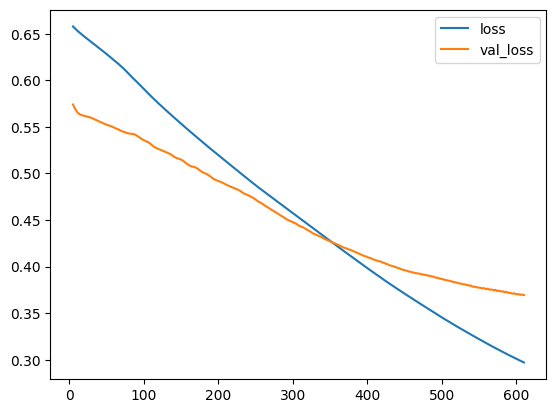

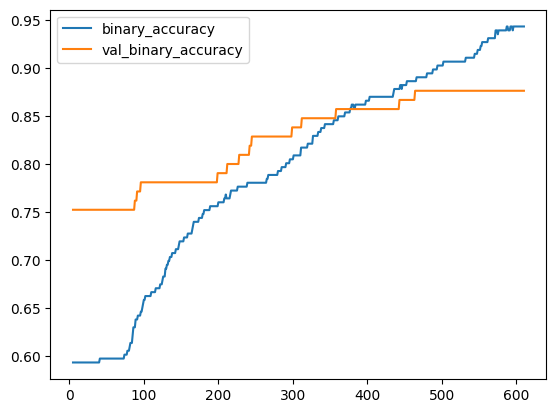

In [33]:
history_df = pd.DataFrame(history.history)
# Start the plot at epoch 5
history_df.loc[5:, ['loss', 'val_loss']].plot()
history_df.loc[5:, ['binary_accuracy', 'val_binary_accuracy']].plot()

# Practice